In [1]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING, TESTING, AND VALIDATION purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training,testing, and validation sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=4,stratify=y)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=4,stratify=y_test)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)
print("Validation data shape: ",X_val.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



Training data shape:  (108, 500, 3)
Testing data shape:  (36, 500, 3)
Validation data shape:  (36, 500, 3)


In [2]:
import matplotlib.pyplot as plt

Q1

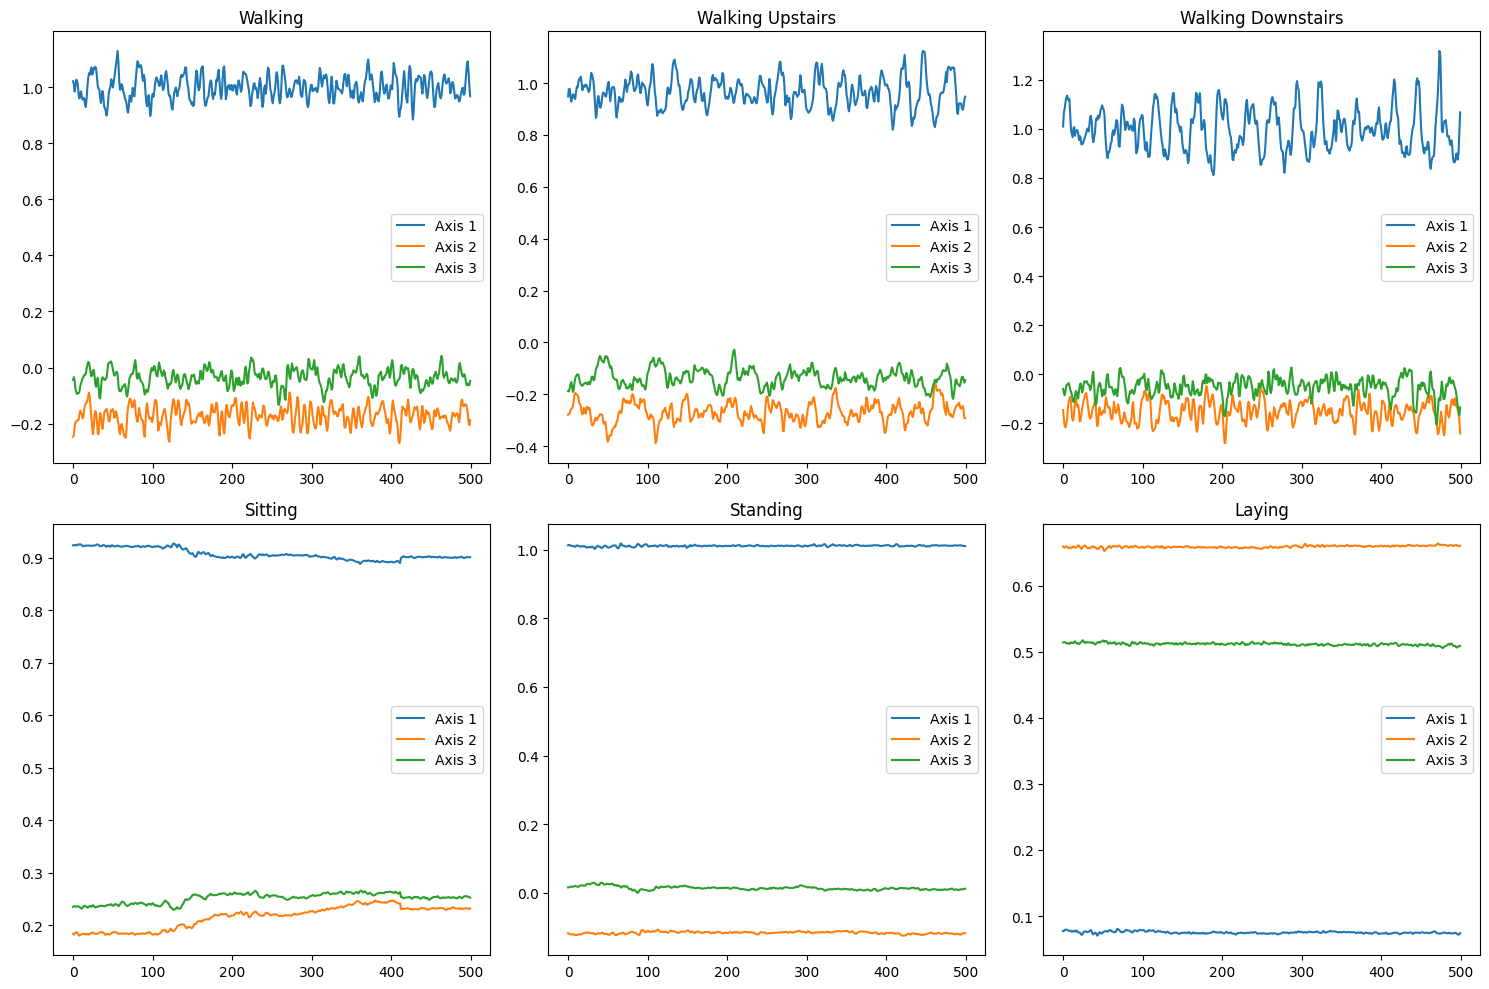

In [3]:
activities = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']
#Dataset is from(1-6) and not zero

plt.figure(figsize=(15, 10))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    activity_data = X_train[y_train == i]

    for j in range(3):
        plt.plot(activity_data[:, :, j].mean(axis=0), label=f'Axis {j+1}')
    #to plot all three axis data
    plt.title(activities[i-1])
    plt.legend()

plt.tight_layout()
plt.show()


We can easily observe the differnece between acceleration of static and dynamic activities. The disturbance is significantly high for dynamic activities. However, it is going to be difficult to understand the difference between individual static and dynamic activities.
The model will be extremely efficient to identify differneces between Static and Dynamic, but it will struggle in determining the differneces between all the dynamic activities.

Q2

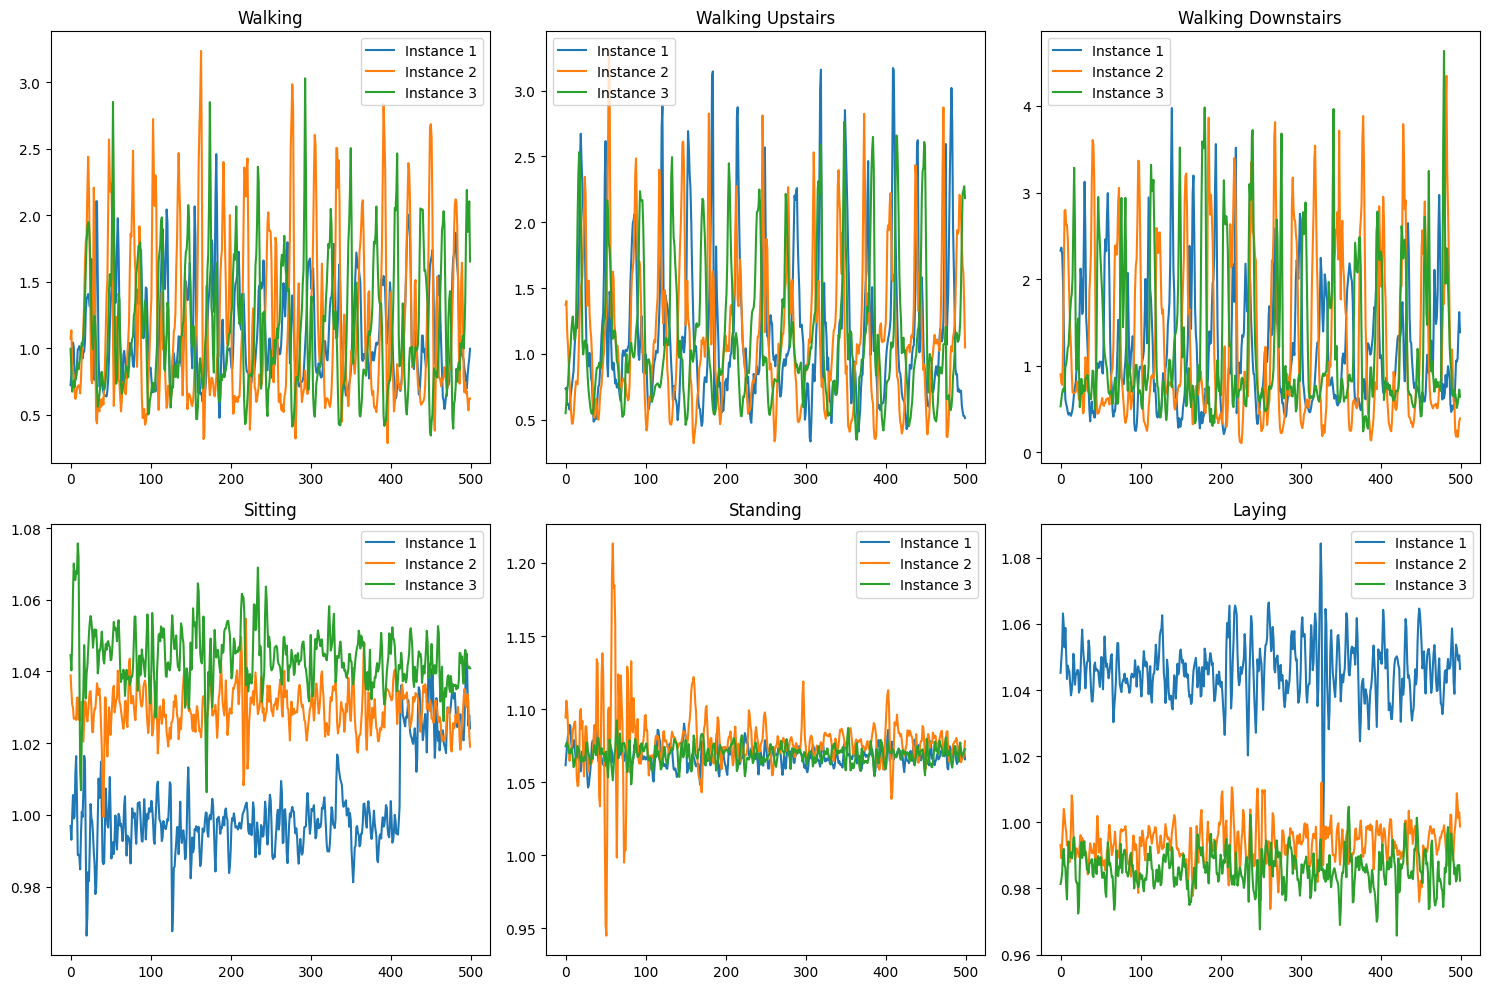

In [5]:
activities = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']

plt.figure(figsize=(15, 10))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    activity_data = X_train[y_train == i]

    selected_instances = activity_data[:3]
    
    #linear acceleration = ax^2+ay^2+az^2
    for j in range(selected_instances.shape[0]):
        total_acceleration = np.sum(selected_instances[j]**2, axis=1)
        
        # Ploting total acceleration for this instance
        plt.plot(total_acceleration, label=f'Instance {j+1}')
    
    plt.title(activities[i-1])
    plt.legend()

plt.tight_layout()
plt.show()


Above is the linear acceleration data for 3 instances. The dynamic activities acceleration ampliude is higher and contains high disturbances as compared to the static acceleration, thus, it is expected that a ml model will able to identify this details.
However, it will be difficult to say about differntiation based on individual activities. On a Decision Tree, it will not able to provide significant accuracies in indivial activities.

Q3

In [6]:
# Decision cannot be trained on a 3d array, thus converting it into a 2d data
X_train_reshaped = X_train.reshape((X_train.shape[0], -1))
X_test_reshaped = X_test.reshape((X_test.shape[0], -1))
X_val_reshaped = X_val.reshape((X_val.shape[0], -1))

There can be two ways to train decision tree either train only on linear acceleration with shape(108,500) or convert it into a 2d array with 1500 columns.

In [7]:
X_train_la = np.sum(np.square(X_train), axis=2)
X_train_la.shape

(108, 500)

In [8]:
X_train_la[:5]

array([[1.06157854, 1.06878783, 1.07663955, ..., 1.07006725, 1.07156541,
        1.06563868],
       [1.09419332, 1.10574467, 1.10035525, ..., 1.06713003, 1.07167885,
        1.077976  ],
       [0.73707041, 0.74262272, 0.61221345, ..., 0.52948693, 0.52883177,
        0.51284538],
       [2.33097815, 2.364194  , 2.28500846, ..., 1.38548177, 1.61923866,
        1.38813831],
       [1.04522071, 1.04903037, 1.05334174, ..., 1.04897366, 1.0505016 ,
        1.04642011]])

In [9]:
X_train_reshaped.shape

(108, 1500)

In [10]:
y_train[:5]

array([5, 5, 2, 3, 6])

In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train_la,y_train)

DecisionTreeClassifier()

In [12]:
X_test_la = np.sum(np.square(X_test), axis=2)
X_test_la.shape

(36, 500)

In [13]:
y_pred = model.predict(X_test_la)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5555555555555556

C:\Users\dosid\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1000x700 with 0 Axes>

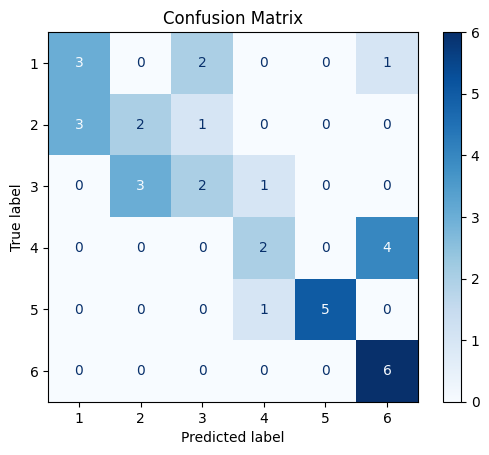

In [14]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
plot_confusion_matrix(model, X_test_la, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


1 WALKING
2 WALKING_UPSTAIRS
3 WALKING_DOWNSTAIRS
4 SITTING
5 STANDING
6 LAYING

Similarly a second model can be trained with X_train reshaped.

In [15]:
model2 = DecisionTreeClassifier()
model2.fit(X_train_reshaped,y_train)

DecisionTreeClassifier()

In [17]:
y_pred2 = model2.predict(X_test_reshaped)
accuracy_score(y_test,y_pred2)

0.6388888888888888

C:\Users\dosid\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1000x700 with 0 Axes>

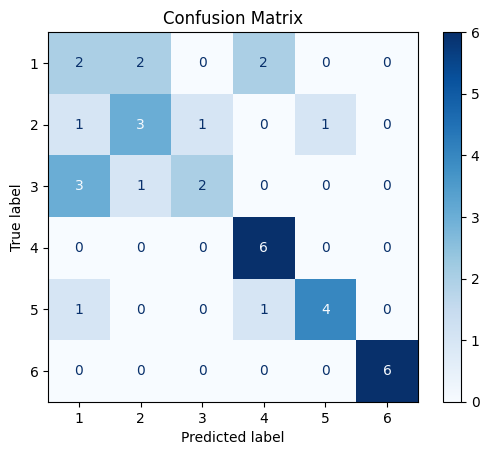

In [19]:
cm = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(10, 7))
plot_confusion_matrix(model2, X_test_reshaped, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Eventhough the accuracies and cm on three axis based acceleration is better as compared to linear acceleration, in question there is no mention about which one to use. Thus, We will be using linear acceleration data and on training as it is used in comparisons for the future questions.

Q4

In [21]:
depths = range(2, 9)
accuracies = []

for depth in depths:
    
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train_la, y_train)
    predictions = dt.predict(X_test_la)
    accuracy = accuracy_score(y_test, predictions)
    
    accuracies.append(accuracy)
    print(f"Depth: {depth}, Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))


Depth: 2, Accuracy: 0.4444444444444444
Confusion Matrix:
[[3 0 1 0 0 2]
 [2 0 0 0 2 2]
 [3 0 1 0 0 2]
 [0 0 0 0 0 6]
 [0 0 0 0 6 0]
 [0 0 0 0 0 6]]
Depth: 3, Accuracy: 0.5833333333333334
Confusion Matrix:
[[2 0 2 2 0 0]
 [1 1 1 2 1 0]
 [0 0 4 1 0 1]
 [0 0 0 2 0 4]
 [0 0 0 0 6 0]
 [0 0 0 0 0 6]]
Depth: 4, Accuracy: 0.5
Confusion Matrix:
[[3 0 1 2 0 0]
 [2 1 1 2 0 0]
 [3 1 1 0 0 1]
 [0 0 0 2 0 4]
 [0 0 0 1 5 0]
 [0 0 0 0 0 6]]
Depth: 5, Accuracy: 0.4444444444444444
Confusion Matrix:
[[3 0 2 1 0 0]
 [1 1 3 1 0 0]
 [0 3 2 0 0 1]
 [0 0 0 2 0 4]
 [0 0 0 1 5 0]
 [0 0 0 3 0 3]]
Depth: 6, Accuracy: 0.4722222222222222
Confusion Matrix:
[[3 1 2 0 0 0]
 [3 1 1 0 0 1]
 [3 0 2 0 0 1]
 [0 0 0 2 0 4]
 [0 0 0 0 6 0]
 [0 0 0 3 0 3]]
Depth: 7, Accuracy: 0.5833333333333334
Confusion Matrix:
[[3 0 2 1 0 0]
 [1 2 0 2 0 1]
 [3 0 2 0 0 1]
 [0 0 0 2 0 4]
 [0 0 0 0 6 0]
 [0 0 0 0 0 6]]
Depth: 8, Accuracy: 0.5277777777777778
Confusion Matrix:
[[3 0 2 1 0 0]
 [2 0 2 2 0 0]
 [3 0 3 0 0 0]
 [0 0 0 2 0 4]
 [0 0 0 1 

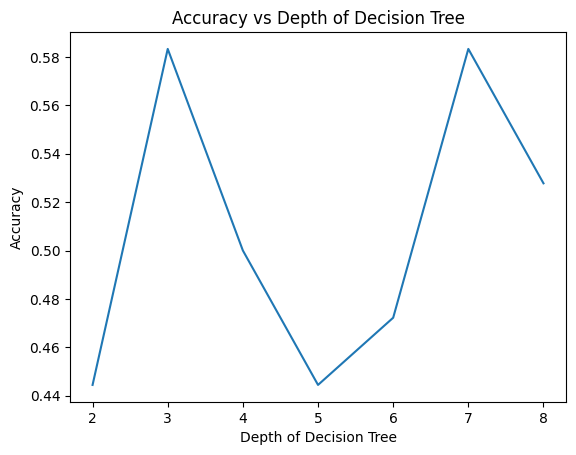

In [22]:
plt.plot(depths, accuracies)
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth of Decision Tree')
plt.show()

Dataset is a bit vague, we may expect an accuracy increase and then decrease because of overfitting and similar to that is happening with the above one as well.

Q5

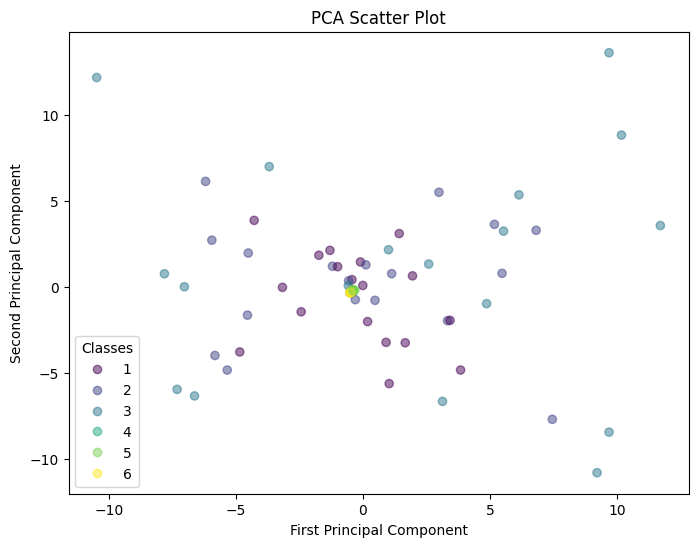

In [23]:
from sklearn.decomposition import PCA

#2 components
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_train_la)

# Plotting the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

It is very difficult for a decision tree to differentiate from the above data about different activities

In [24]:
!pip install tsfel

In [26]:
import tsfel
from sklearn.decomposition import PCA

#Time Series Feature Extraction Library feature configuration
ts = tsfel.get_features_by_domain()

features_df = pd.DataFrame()

for i in range(X_train_la.shape[0]):
    total_acceleration = X_train_la[i]
    
    features = tsfel.time_series_features_extractor(ts, pd.DataFrame(total_acceleration, columns=['total_acceleration']))
    
    features_df = features_df.append(features, ignore_index=True)

features_df

*** Feature extraction started ***
60


C:\Users\dosid\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Using default sampling frequency set in configuration file.
  del sys.path[0]



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***


,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,...,0_Wavelet variance_0,0_Wavelet variance_1,0_Wavelet variance_2,0_Wavelet variance_3,0_Wavelet variance_4,0_Wavelet variance_5,0_Wavelet variance_6,0_Wavelet variance_7,0_Wavelet variance_8,0_Zero crossing rate
0,570.211290,5.328796,570.211290,2.494760,100.0,400.0,1.062823,1.072469,0.002,0.004,...,0.001725,0.006250,0.013901,0.024398,0.037592,0.053408,0.071725,0.092376,0.115233,0.0
1,580.784862,5.376903,580.784862,2.490662,100.0,400.0,1.068174,1.085206,0.002,0.004,...,0.002116,0.007580,0.015179,0.025570,0.038769,0.054343,0.072258,0.092571,0.115261,0.0
2,841.736615,5.787312,841.736615,2.539326,100.0,400.0,0.706582,1.506981,0.002,0.004,...,0.093425,0.350189,0.669983,1.214540,2.041829,3.010988,3.831435,4.239390,4.158075,0.0
3,892.820477,5.771893,892.820477,2.369499,100.0,400.0,0.589942,1.672927,0.002,0.004,...,0.125498,0.476352,1.128229,2.061566,3.192953,4.246390,4.817924,4.738140,4.148533,0.0
4,547.123960,5.219683,547.123960,2.495340,100.0,400.0,1.039742,1.052347,0.002,0.004,...,0.001693,0.006186,0.013468,0.023414,0.036009,0.051119,0.068538,0.088139,0.109879,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1181.973193,6.180277,1181.973193,2.515535,100.0,400.0,0.533665,2.136107,0.002,0.004,...,0.147851,0.819991,2.271607,4.384711,6.833277,9.017171,10.032888,9.459269,7.693115,0.0
104,759.961387,5.722582,759.961387,2.452748,100.0,400.0,0.692738,1.584723,0.002,0.004,...,0.064887,0.254307,0.469598,0.972118,1.656387,2.215872,2.406482,2.188622,1.714141,0.0
105,568.033941,5.318381,568.033941,2.497368,100.0,400.0,1.057803,1.074541,0.002,0.004,...,0.001782,0.006418,0.013708,0.023907,0.036920,0.052438,0.070508,0.091182,0.114376,0.0
106,831.428666,5.783786,831.428666,2.543010,100.0,400.0,0.737660,1.550728,0.002,0.004,...,0.091375,0.390448,0.809132,1.417882,2.136257,2.846445,3.332337,3.415610,3.104444,0.0


In [27]:
features_df.shape

(108, 385)

Importing only time series related features

In [28]:
pca2 = PCA(n_components=2)
PrincipalComponents = pca2.fit_transform(features_df)

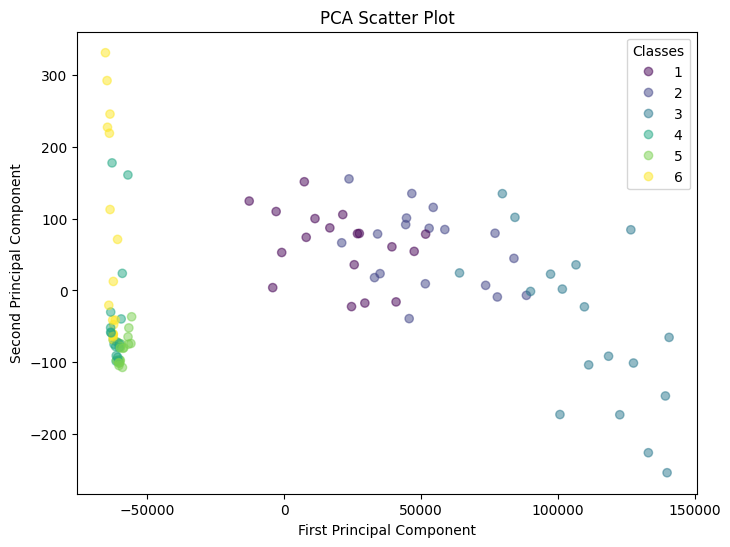

In [33]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(PrincipalComponents[:, 0], PrincipalComponents[:, 1], c=y_train, alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

We can a see a lot of improvement in terms activity differentiation. It is easy to build boundries on such a dataset rather than directly using PCA

In [35]:
PrincipalComponents[:3]

array([[-59901.4461968 ,    -97.3386822 ],
       [-56030.08569357,    -73.91078245],
       [ 52989.7187432 ,     86.65535845]])

Q6

In [38]:
#Using features extracted from tsfel to implement decision tree
model3 = DecisionTreeClassifier()
model3.fit(features_df, y_train)

DecisionTreeClassifier()

In [39]:
ts2 = tsfel.get_features_by_domain()

X_test_tsfel = pd.DataFrame()

for i in range(X_test_la.shape[0]):
    total_acceleration = X_test_la[i]
    
    features2 = tsfel.time_series_features_extractor(ts2, pd.DataFrame(total_acceleration, columns=['total_acceleration']))
    
    # Append the features to the dataframe
    X_test_tsfel = X_test_tsfel.append(features2, ignore_index=True)

X_test_tsfel

*** Feature extraction started ***
60


C:\Users\dosid\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Using default sampling frequency set in configuration file.
  



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***


,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,...,0_Wavelet variance_0,0_Wavelet variance_1,0_Wavelet variance_2,0_Wavelet variance_3,0_Wavelet variance_4,0_Wavelet variance_5,0_Wavelet variance_6,0_Wavelet variance_7,0_Wavelet variance_8,0_Zero crossing rate
0,1033.973888,5.914731,1033.973888,2.522637,100.0,400.0,0.637482,1.482877,0.002,0.004,...,0.254292,1.372765,2.238206,2.894880,3.447620,3.867725,4.125173,4.153183,3.929609,0.0
1,1142.877789,6.062938,1142.877789,2.431067,100.0,400.0,0.546162,1.869132,0.002,0.004,...,0.153879,1.054621,2.581760,4.429750,6.436853,7.989646,8.304148,7.307554,5.622882,0.0
2,495.803027,4.966741,495.803027,2.495641,100.0,400.0,0.980898,1.008173,0.002,0.004,...,0.002056,0.008785,0.017183,0.025501,0.035316,0.047469,0.062151,0.079222,0.098446,0.0
3,746.480106,5.574960,746.480106,2.474905,100.0,400.0,0.711075,1.428686,0.002,0.004,...,0.026076,0.195985,0.500761,0.934252,1.540019,2.285645,3.028388,3.560449,3.727168,0.0
4,511.342970,5.046138,511.342970,2.494618,100.0,400.0,1.006090,1.016915,0.002,0.004,...,0.001602,0.005733,0.012338,0.021225,0.032503,0.046250,0.062366,0.080692,0.101098,0.0
5,575.540435,5.352620,575.540435,2.493531,100.0,400.0,1.064505,1.081232,0.002,0.004,...,0.002020,0.007387,0.015384,0.025722,0.038558,0.053674,0.070970,0.090628,0.112889,0.0
6,499.412402,4.986916,499.412402,2.495848,100.0,400.0,0.993521,1.005487,0.002,0.004,...,0.001526,0.005549,0.012059,0.021043,0.032575,0.046322,0.061939,0.079381,0.098786,0.0
7,798.406609,5.771647,798.406609,2.461333,100.0,400.0,0.720359,1.545629,0.002,0.004,...,0.137761,0.482584,0.529545,0.902958,1.502195,2.083449,2.427220,2.419525,2.101153,0.0
8,744.735347,5.678594,744.735347,2.463145,100.0,400.0,0.773886,1.544210,0.002,0.004,...,0.084842,0.340514,0.508585,0.807575,1.195007,1.509568,1.644726,1.574711,1.346570,0.0
9,933.215196,5.950768,933.215196,2.591263,100.0,400.0,0.642852,1.743616,0.002,0.004,...,0.121200,0.615835,1.168688,1.912396,2.847377,3.830725,4.623797,4.970270,4.765639,0.0


In [40]:
y_pred_tsfel = model3.predict(X_test_tsfel)
accuracy_score(y_test,y_pred_tsfel)

0.8055555555555556

Significant improvement in accuracy

C:\Users\dosid\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1000x700 with 0 Axes>

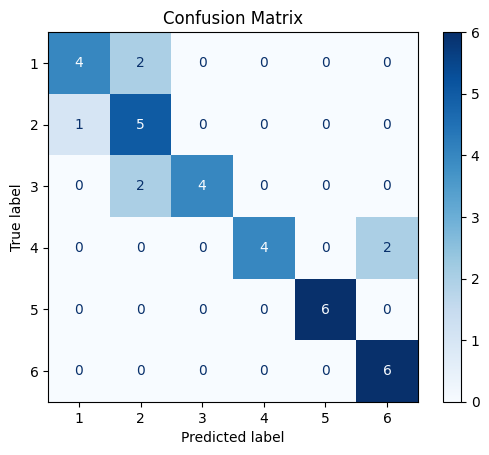

In [41]:
cm = confusion_matrix(y_test, y_pred_tsfel)

plt.figure(figsize=(10, 7))
plot_confusion_matrix(model3, X_test_tsfel, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [43]:
accuracies_tsfel = []

for depth in depths:
    
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(features_df, y_train)
    predictions = dt.predict(X_test_tsfel)
    accuracy = accuracy_score(y_test, predictions)
    
    accuracies_tsfel.append(accuracy)
    print(f"Depth: {depth}, Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))

Depth: 2, Accuracy: 0.5555555555555556
Confusion Matrix:
[[4 2 0 0 0 0]
 [1 5 0 0 0 0]
 [0 6 0 0 0 0]
 [0 0 0 0 0 6]
 [1 0 0 0 5 0]
 [0 0 0 0 0 6]]
Depth: 3, Accuracy: 0.75
Confusion Matrix:
[[4 2 0 0 0 0]
 [1 5 0 0 0 0]
 [0 2 4 0 0 0]
 [0 0 0 2 0 4]
 [0 0 0 0 6 0]
 [0 0 0 0 0 6]]
Depth: 4, Accuracy: 0.6388888888888888
Confusion Matrix:
[[4 1 0 1 0 0]
 [1 5 0 0 0 0]
 [1 2 3 0 0 0]
 [0 0 0 4 0 2]
 [0 0 0 3 3 0]
 [0 0 0 2 0 4]]
Depth: 5, Accuracy: 0.6944444444444444
Confusion Matrix:
[[4 1 1 0 0 0]
 [1 5 0 0 0 0]
 [0 3 3 0 0 0]
 [0 0 0 5 0 1]
 [0 0 0 0 6 0]
 [0 0 0 4 0 2]]
Depth: 6, Accuracy: 0.6666666666666666
Confusion Matrix:
[[5 0 1 0 0 0]
 [3 3 0 0 0 0]
 [0 2 4 0 0 0]
 [0 0 0 2 0 4]
 [0 0 0 0 6 0]
 [0 0 0 2 0 4]]
Depth: 7, Accuracy: 0.6944444444444444
Confusion Matrix:
[[6 0 0 0 0 0]
 [3 3 0 0 0 0]
 [0 2 4 0 0 0]
 [0 0 0 4 0 2]
 [0 0 0 2 4 0]
 [0 0 0 2 0 4]]
Depth: 8, Accuracy: 0.7222222222222222
Confusion Matrix:
[[4 2 0 0 0 0]
 [1 5 0 0 0 0]
 [0 2 4 0 0 0]
 [0 0 0 5 0 1]
 [0 0 0 0

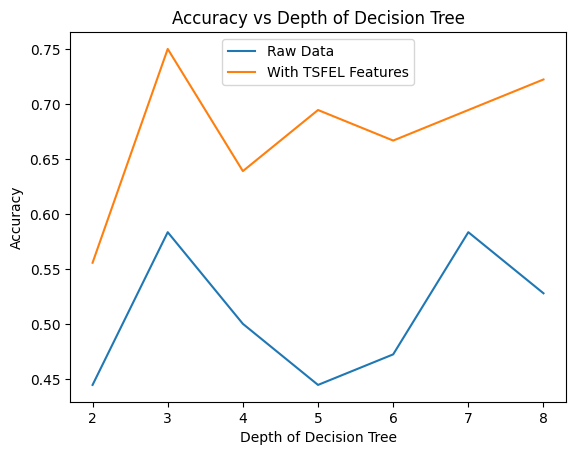

In [44]:
plt.plot(depths, accuracies, label = "Raw Data")
plt.plot(depths, accuracies_tsfel, label = 'With TSFEL Features')
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth of Decision Tree')
plt.legend()
plt.show()

Q7

Static Activites were predicted correctly except sitting, however, dynamic activities showed less accuracy with walking and walking downstairs showed the least.
We can see that sitting was confused with laying 2/6 times. This is expected as no major accelerometer movement takes place in the activity.
Also both walking and walking downstairs was confused with walking upstairs, maybe because in that samples the differnece in accelerometer would be small.